In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append("../")

from cube3_game import Cube3Game

In [2]:
df_1000 = pd.read_pickle("../assets/reports/cpp_reports_1000.pkl")

In [5]:
df_1000["solution_len"] = [len(s) for s in df_1000["solution"]]

In [9]:
df_1000["duration_sec"].sum() / 3600

1.1093244444444443

<Axes: >

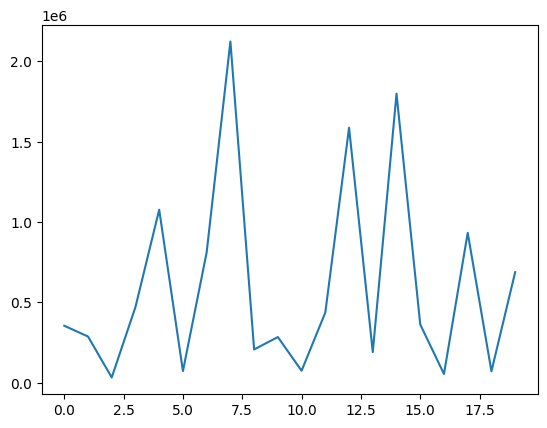

In [11]:
df_1000["visit_nodes"].plot()

In [340]:
df = pd.read_pickle("../assets/reports/cpp_reports.pkl")

In [341]:
df

,i,state,target_distance,solution,h_values,visit_nodes,duration_sec
0,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
1,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
3,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
4,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
...,...,...,...,...,...,...,...
995,995,"[47, 39, 20, 1, 31, 52, 51, 23, 11, 35, 30, 18...",29,"[-1, 0, 8, 17, 6, 11, 0, 17, 11, 3, 16, 11, 1,...","[24.726, 21.979, 20.859, 19.661, 17.922, 17.04...",209623,65.866
996,996,"[0, 1, 17, 12, 13, 50, 26, 23, 35, 33, 30, 51,...",29,"[-1, 14, 7, 0, 7, 4, 9, 11, 1, 11, 0, 5, 7, 2]","[19.744, 20.637, 19.302, 16.938, 16.725, 15.53...",40341,11.599
997,997,"[6, 19, 20, 32, 13, 48, 29, 1, 17, 0, 28, 47, ...",29,"[-1, 2, 5, 8, 12, 4, 14, 2, 1, 13, 4, 0, 7, 15...","[19.382, 19.42, 17.302, 16.208, 13.849, 11.68,...",1571,0.397
998,998,"[42, 32, 2, 50, 4, 21, 0, 30, 33, 36, 23, 26, ...",29,"[-1, 11, 3, 6, 3, 12, 8, 1, 14, 5, 17, 5, 5, 1...","[23.999, 20.958, 18.883, 18.607, 16.072, 15.25...",24927,7.018


<Axes: >

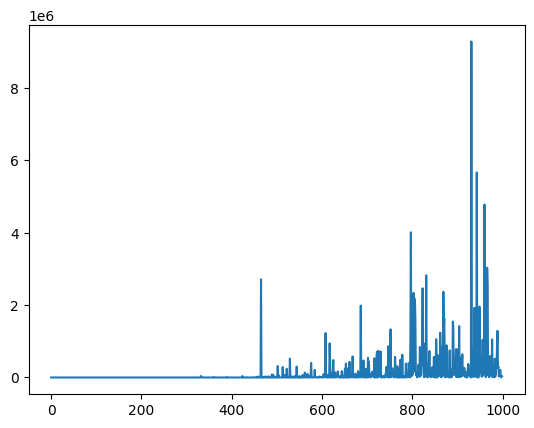

In [343]:
df["visit_nodes"].plot()

In [ ]:
s -> [a, b, c, d, e]

In [323]:
game = Cube3Game("../assets/envs/cube_3_3_3_actions.pickle")

In [324]:
records = df.to_dict("records")

for r in records:
    if r["target_distance"] == 0:
        continue

    solution = r["solution"]
    state = r["state"]

    for a in solution[1:]:
        state = game.apply_action(state, action=a)

    if not game.is_goal_by_state(state):
        print("Bad solution:", r["i"])

In [325]:
df["duration_sec"].sum() / 3600

12.255812500000001

In [345]:
df["solution_len"] = [len(s) for s in df["solution"]]

In [346]:
hard_df = df[(df["solution_len"] > 19) & (df["target_distance"] > 19)]

In [328]:
hard_df["duration_sec"].mean()

153.66564980544746

In [329]:
hard_df["duration_sec"].sum() / 3600

10.97002

In [348]:
len(hard_df)

257

In [331]:
df[(df["solution_len"] < 10) & (df["target_distance"] > 19)]

,i,state,target_distance,solution,h_values,visit_nodes,duration_sec,solution_len
673,673,"[2, 34, 38, 1, 13, 41, 0, 50, 44, 36, 25, 45, ...",20,"[-1, 8, 15, 15, 17, 2, 1]","[9.238, 6.157, 4.097, 3.189, 2.746, 1.227, 0.14]",8,0.003,7
